In [1]:
import pandas as pd
data = pd.read_csv('지역_시간/dataframe/신규_기존.csv')
data

,cust_no,2014_1,2014_2,2015_1,2015_2,2014_1_신규,2014_2_신규,2015_1_신규,2015_2_이탈
0,1,19925355.0,34116312.0,17898365.0,13102518.0,기존,기존,기존,기존
1,2,24323230.0,21922100.0,27791610.0,25843820.0,기존,기존,기존,기존
2,3,851215.0,1042554.0,592280.0,679118.0,기존,기존,기존,기존
3,4,5042106.0,4257510.0,3656937.0,3737257.0,기존,기존,기존,기존
4,5,5460150.0,2225730.0,2934930.0,2616260.0,기존,기존,기존,기존
...,...,...,...,...,...,...,...,...,...
19378,19379,NaN,1190620.0,2395920.0,2192740.0,신규,기존,기존,기존
19379,19380,NaN,522700.0,837950.0,2552327.0,신규,기존,기존,기존
19380,19381,NaN,NaN,2797171.0,3243498.0,신규,신규,기존,기존
19381,19382,NaN,NaN,1826739.0,2575034.0,신규,신규,기존,기존


In [2]:
data.fillna(0, inplace=True)
data['label'] = data['2015_2'] - data['2014_1']
data['label'] = data['label'].apply(lambda x : 1 if x < 0 else 0)

In [4]:
# test = pd.read_csv('dataset/test_최종변수_1.csv')
lab = test[['cust_no','label']]
lab

,cust_no,label
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
19333,19376,0
19334,19377,0
19335,19378,0
19336,19379,0


In [6]:
data[['cust_no','label']]

,cust_no,label
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1
...,...,...
19378,19379,0
19379,19380,0
19380,19381,0
19381,19382,0


In [7]:
df = pd.merge(data[['cust_no','label']], lab[['cust_no','label']], on='cust_no',how='right')
df

,cust_no,label_x,label_y
0,1,1,1
1,2,0,0
2,3,1,1
3,4,1,1
4,5,1,1
...,...,...,...
19333,19376,0,0
19334,19377,0,0
19335,19378,0,0
19336,19379,0,0


In [8]:
df.loc[df['label_x'] != df['label_y']]

,cust_no,label_x,label_y
9,10,1,0
10,11,1,0
13,14,1,0
19,20,1,0
23,24,0,1
...,...,...,...
19176,19325,1,0
19186,19335,1,0
19195,19344,1,0
19210,1208,0,1


In [18]:
train.drop('label',axis=1, inplace=True)
lab = pd.merge(train, data[['cust_no','label']],on='cust_no',how='left')
lab.to_csv('dataset/train_최종변수_1.csv',index=False)

In [14]:
lab

,cust_no,mem_1,mem_2,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,...,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,의류_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,의류_C_ratio,label
0,1,-1.0,-1.0,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,...,0.056971,0.001167,0.003781,0.000000,0.000000,0.002726,-0.000112,0.000339,0.000000,1
1,2,-1.0,-1.0,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,...,0.086147,0.000000,0.000000,0.001020,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,3,-1.0,-1.0,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,...,-0.046992,0.000000,0.000000,0.000000,0.000000,-0.045363,0.060232,0.032123,0.000000,1
3,4,-1.0,-1.0,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,...,-0.042642,0.013859,0.011085,0.001807,0.011474,0.002957,-0.010797,-0.000637,-0.001785,1
4,5,-1.0,-1.0,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,...,0.029534,0.000000,-0.001465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,-1.0,-1.0,0.000000,0.347826,0.1,0.0,0.6,0.0,0.2,...,0.010978,0.244833,0.142434,0.026876,0.000000,0.001165,0.000000,0.000000,0.000000,0
19334,19377,-1.0,2.0,0.000000,0.600000,0.1,0.1,0.1,0.0,0.1,...,0.151546,0.031368,0.000000,0.004604,0.000000,0.000000,0.000000,0.000000,0.000000,0
19335,19378,-1.0,-1.0,0.000000,0.263158,0.2,0.4,0.1,0.0,0.1,...,0.022743,0.000086,0.000000,0.000427,0.000000,0.002159,0.001443,0.001567,0.000000,0
19336,19379,-1.0,1.0,0.000000,0.142857,0.3,0.4,0.0,0.0,0.2,...,0.276710,0.011643,0.000000,0.051787,0.022346,0.011183,0.016952,0.000355,0.000000,0


In [15]:
train = pd.read_csv('dataset/train_최종변수_1.csv')
train

,cust_no,mem_1,mem_2,label,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,...,일상용품_A_ratio,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,의류_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,의류_C_ratio
0,1,-1.0,-1.0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,...,0.022066,-0.135293,0.003009,0.001439,0.004689,0.000000,0.001736,-0.000424,0.000355,0.000000
1,2,-1.0,-1.0,0,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,...,-0.009637,0.135874,0.000000,0.000000,0.000865,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,-1.0,-1.0,1,0.025802,0.049851,0.2,-0.1,0.1,3.2,...,0.000000,-0.093983,0.001880,0.000000,0.004796,0.000000,-0.099754,0.087583,0.073676,0.000000
3,4,-1.0,-1.0,1,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,...,0.150507,-0.139815,0.017321,0.014637,0.005316,0.023895,-0.000811,-0.030110,-0.000586,-0.001245
4,5,-1.0,-1.0,1,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,...,-0.114220,-0.024847,0.000000,-0.002930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,-1.0,-1.0,0,0.000000,0.347826,0.1,0.0,0.6,0.0,...,0.000000,0.000000,0.546731,0.446683,0.006586,0.000000,0.000000,0.000000,0.000000,0.000000
19334,19377,-1.0,2.0,0,0.000000,0.600000,0.1,0.1,0.1,0.0,...,0.000000,0.414710,0.154930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19335,19378,-1.0,-1.0,0,0.000000,0.263158,0.2,0.4,0.1,0.0,...,0.343795,0.318561,0.000000,0.000000,0.128486,0.000000,0.000000,0.000000,0.000000,0.000000
19336,19379,-1.0,1.0,0,0.000000,0.142857,0.3,0.4,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
data['label'] = data['2015_1'] - data['2014_1']
data['label'] = data['label'].apply(lambda x: 1 if x < 0 else 0)
data

,cust_no,2014_1,2014_2,2015_1,2015_2,2014_1_신규,2014_2_신규,2015_1_신규,2015_2_이탈,label
0,1,19925355.0,34116312.0,17898365.0,13102518.0,기존,기존,기존,기존,1
1,2,24323230.0,21922100.0,27791610.0,25843820.0,기존,기존,기존,기존,0
2,3,851215.0,1042554.0,592280.0,679118.0,기존,기존,기존,기존,1
3,4,5042106.0,4257510.0,3656937.0,3737257.0,기존,기존,기존,기존,1
4,5,5460150.0,2225730.0,2934930.0,2616260.0,기존,기존,기존,기존,1
...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,2395920.0,2192740.0,신규,기존,기존,기존,0
19379,19380,0.0,522700.0,837950.0,2552327.0,신규,기존,기존,기존,0
19380,19381,0.0,0.0,2797171.0,3243498.0,신규,신규,기존,기존,0
19381,19382,0.0,0.0,1826739.0,2575034.0,신규,신규,기존,기존,0


In [17]:
df = pd.merge(data[['cust_no','label']], train[['cust_no','label']], on='cust_no',how='right')
df.loc[df['label_x'] != df['label_y']]

,cust_no,label_x,label_y
19210,1208,0,1
19236,10613,0,1


In [20]:
data['sum_3'] = data['2014_1'] + data['2014_2'] + data['2015_1']
data['sum_2'] = data['2014_1'] + data['2014_2']

In [54]:
data['sum_23'] = data['2014_2'] + data['2015_1']
data['level'] = pd.qcut(data['sum_23'],10)

di2 = {}
for idx, d in enumerate(data.level.unique().sort_values()):
    di2[d] = idx
    
data['level'] = data['level'].apply(lambda x: di2[x])
data

,cust_no,2014_1,2014_2,2015_1,2015_2,2014_1_신규,2014_2_신규,2015_1_신규,2015_2_이탈,label,sum_3,sum_2,level_3,level_2,level_3_,level_2_,sum_23,level
0,1,19925355.0,34116312.0,17898365.0,13102518.0,기존,기존,기존,기존,1,71940032.0,54041667.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]",9,9,52014677.0,9
1,2,24323230.0,21922100.0,27791610.0,25843820.0,기존,기존,기존,기존,0,74036940.0,46245330.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]",9,9,49713710.0,9
2,3,851215.0,1042554.0,592280.0,679118.0,기존,기존,기존,기존,1,2486049.0,1893769.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0,1634834.0,0
3,4,5042106.0,4257510.0,3656937.0,3737257.0,기존,기존,기존,기존,1,12956553.0,9299616.0,"(12750689.0, 16249279.8]","(8357765.0, 10598067.2]",5,5,7914447.0,4
4,5,5460150.0,2225730.0,2934930.0,2616260.0,기존,기존,기존,기존,1,10620810.0,7685880.0,"(10554691.8, 12750689.0]","(6854916.2, 8357765.0]",4,4,5160660.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,2395920.0,2192740.0,신규,기존,기존,기존,0,3586540.0,1190620.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0,3586540.0,0
19379,19380,0.0,522700.0,837950.0,2552327.0,신규,기존,기존,기존,0,1360650.0,522700.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0,1360650.0,0
19380,19381,0.0,0.0,2797171.0,3243498.0,신규,신규,기존,기존,0,2797171.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0,2797171.0,0
19381,19382,0.0,0.0,1826739.0,2575034.0,신규,신규,기존,기존,0,1826739.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0,1826739.0,0


In [22]:
data['level_3'] = pd.qcut(data['sum_3'],10)
data['level_2'] = pd.qcut(data['sum_2'],10)
data

,cust_no,2014_1,2014_2,2015_1,2015_2,2014_1_신규,2014_2_신규,2015_1_신규,2015_2_이탈,label,sum_3,sum_2,level_3,level_2
0,1,19925355.0,34116312.0,17898365.0,13102518.0,기존,기존,기존,기존,1,71940032.0,54041667.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]"
1,2,24323230.0,21922100.0,27791610.0,25843820.0,기존,기존,기존,기존,0,74036940.0,46245330.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]"
2,3,851215.0,1042554.0,592280.0,679118.0,기존,기존,기존,기존,1,2486049.0,1893769.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]"
3,4,5042106.0,4257510.0,3656937.0,3737257.0,기존,기존,기존,기존,1,12956553.0,9299616.0,"(12750689.0, 16249279.8]","(8357765.0, 10598067.2]"
4,5,5460150.0,2225730.0,2934930.0,2616260.0,기존,기존,기존,기존,1,10620810.0,7685880.0,"(10554691.8, 12750689.0]","(6854916.2, 8357765.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,2395920.0,2192740.0,신규,기존,기존,기존,0,3586540.0,1190620.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]"
19379,19380,0.0,522700.0,837950.0,2552327.0,신규,기존,기존,기존,0,1360650.0,522700.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]"
19380,19381,0.0,0.0,2797171.0,3243498.0,신규,신규,기존,기존,0,2797171.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]"
19381,19382,0.0,0.0,1826739.0,2575034.0,신규,신규,기존,기존,0,1826739.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]"


In [25]:
di = {}
for idx, d in enumerate(data.level_3.unique().sort_values()):
    di[d] = idx

In [27]:
data['level_3_'] = data['level_3'].apply(lambda x: di[x])
data

,cust_no,2014_1,2014_2,2015_1,2015_2,2014_1_신규,2014_2_신규,2015_1_신규,2015_2_이탈,label,sum_3,sum_2,level_3,level_2,level_3_
0,1,19925355.0,34116312.0,17898365.0,13102518.0,기존,기존,기존,기존,1,71940032.0,54041667.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]",9
1,2,24323230.0,21922100.0,27791610.0,25843820.0,기존,기존,기존,기존,0,74036940.0,46245330.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]",9
2,3,851215.0,1042554.0,592280.0,679118.0,기존,기존,기존,기존,1,2486049.0,1893769.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0
3,4,5042106.0,4257510.0,3656937.0,3737257.0,기존,기존,기존,기존,1,12956553.0,9299616.0,"(12750689.0, 16249279.8]","(8357765.0, 10598067.2]",5
4,5,5460150.0,2225730.0,2934930.0,2616260.0,기존,기존,기존,기존,1,10620810.0,7685880.0,"(10554691.8, 12750689.0]","(6854916.2, 8357765.0]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,2395920.0,2192740.0,신규,기존,기존,기존,0,3586540.0,1190620.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0
19379,19380,0.0,522700.0,837950.0,2552327.0,신규,기존,기존,기존,0,1360650.0,522700.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0
19380,19381,0.0,0.0,2797171.0,3243498.0,신규,신규,기존,기존,0,2797171.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0
19381,19382,0.0,0.0,1826739.0,2575034.0,신규,신규,기존,기존,0,1826739.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0


In [31]:
di1 = {}
for idx, d in enumerate(data.level_2.unique().sort_values()):
    di1[d] = idx
    
data['level_2_'] = data['level_2'].apply(lambda x: di1[x])
data

,cust_no,2014_1,2014_2,2015_1,2015_2,2014_1_신규,2014_2_신규,2015_1_신규,2015_2_이탈,label,sum_3,sum_2,level_3,level_2,level_3_,level_2_
0,1,19925355.0,34116312.0,17898365.0,13102518.0,기존,기존,기존,기존,1,71940032.0,54041667.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]",9,9
1,2,24323230.0,21922100.0,27791610.0,25843820.0,기존,기존,기존,기존,0,74036940.0,46245330.0,"(58725603.2, 2323903306.0]","(38634874.6, 2103318466.0]",9,9
2,3,851215.0,1042554.0,592280.0,679118.0,기존,기존,기존,기존,1,2486049.0,1893769.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0
3,4,5042106.0,4257510.0,3656937.0,3737257.0,기존,기존,기존,기존,1,12956553.0,9299616.0,"(12750689.0, 16249279.8]","(8357765.0, 10598067.2]",5,5
4,5,5460150.0,2225730.0,2934930.0,2616260.0,기존,기존,기존,기존,1,10620810.0,7685880.0,"(10554691.8, 12750689.0]","(6854916.2, 8357765.0]",4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,2395920.0,2192740.0,신규,기존,기존,기존,0,3586540.0,1190620.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0
19379,19380,0.0,522700.0,837950.0,2552327.0,신규,기존,기존,기존,0,1360650.0,522700.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0
19380,19381,0.0,0.0,2797171.0,3243498.0,신규,신규,기존,기존,0,2797171.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0
19381,19382,0.0,0.0,1826739.0,2575034.0,신규,신규,기존,기존,0,1826739.0,0.0,"(-0.001, 5532284.0]","(-0.001, 3419312.6]",0,0


In [34]:
lab1 = pd.merge(lab, data[['cust_no','level_2_']],how='left',on='cust_no')
lab1

,cust_no,mem_1,mem_2,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,...,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,의류_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,의류_C_ratio,label,level_2_
0,1,-1.0,-1.0,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,...,0.003009,0.001439,0.004689,0.000000,0.001736,-0.000424,0.000355,0.000000,1,9
1,2,-1.0,-1.0,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,...,0.000000,0.000000,0.000865,0.000000,0.000000,0.000000,0.000000,0.000000,0,9
2,3,-1.0,-1.0,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,...,0.001880,0.000000,0.004796,0.000000,-0.099754,0.087583,0.073676,0.000000,1,0
3,4,-1.0,-1.0,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,...,0.017321,0.014637,0.005316,0.023895,-0.000811,-0.030110,-0.000586,-0.001245,1,5
4,5,-1.0,-1.0,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,...,0.000000,-0.002930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,-1.0,-1.0,0.000000,0.347826,0.1,0.0,0.6,0.0,0.2,...,0.546731,0.446683,0.006586,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
19334,19377,-1.0,2.0,0.000000,0.600000,0.1,0.1,0.1,0.0,0.1,...,0.154930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
19335,19378,-1.0,-1.0,0.000000,0.263158,0.2,0.4,0.1,0.0,0.1,...,0.000000,0.000000,0.128486,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
19336,19379,-1.0,1.0,0.000000,0.142857,0.3,0.4,0.0,0.0,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


In [35]:
test = pd.read_csv('dataset/test_최종변수_1.csv')
test

,cust_no,mem_1,mem_2,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,...,의류_A_ratio,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,의류_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,의류_C_ratio,label
0,1,-1.0,-1.0,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,...,0.056971,0.001167,0.003781,0.000000,0.000000,0.002726,-0.000112,0.000339,0.000000,1
1,2,-1.0,-1.0,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,...,0.086147,0.000000,0.000000,0.001020,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,3,-1.0,-1.0,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,...,-0.046992,0.000000,0.000000,0.000000,0.000000,-0.045363,0.060232,0.032123,0.000000,1
3,4,-1.0,-1.0,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,...,-0.042642,0.013859,0.011085,0.001807,0.011474,0.002957,-0.010797,-0.000637,-0.001785,1
4,5,-1.0,-1.0,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,...,0.029534,0.000000,-0.001465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,-1.0,-1.0,0.000000,0.347826,0.1,0.0,0.6,0.0,0.2,...,0.010978,0.244833,0.142434,0.026876,0.000000,0.001165,0.000000,0.000000,0.000000,0
19334,19377,-1.0,2.0,0.000000,0.600000,0.1,0.1,0.1,0.0,0.1,...,0.151546,0.031368,0.000000,0.004604,0.000000,0.000000,0.000000,0.000000,0.000000,0
19335,19378,-1.0,-1.0,0.000000,0.263158,0.2,0.4,0.1,0.0,0.1,...,0.022743,0.000086,0.000000,0.000427,0.000000,0.002159,0.001443,0.001567,0.000000,0
19336,19379,-1.0,1.0,0.000000,0.142857,0.3,0.4,0.0,0.0,0.2,...,0.276710,0.011643,0.000000,0.051787,0.022346,0.011183,0.016952,0.000355,0.000000,0


In [37]:
test1 = pd.merge(test, data[['cust_no','level_3_']],how='left',on='cust_no')
test1

,cust_no,mem_1,mem_2,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,...,가공식품_B_ratio,신선식품_B_ratio,일상용품_B_ratio,의류_B_ratio,가공식품_C_ratio,신선식품_C_ratio,일상용품_C_ratio,의류_C_ratio,label,level_3_
0,1,-1.0,-1.0,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,...,0.001167,0.003781,0.000000,0.000000,0.002726,-0.000112,0.000339,0.000000,1,9
1,2,-1.0,-1.0,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,...,0.000000,0.000000,0.001020,0.000000,0.000000,0.000000,0.000000,0.000000,0,9
2,3,-1.0,-1.0,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,...,0.000000,0.000000,0.000000,0.000000,-0.045363,0.060232,0.032123,0.000000,1,0
3,4,-1.0,-1.0,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,...,0.013859,0.011085,0.001807,0.011474,0.002957,-0.010797,-0.000637,-0.001785,1,5
4,5,-1.0,-1.0,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,...,0.000000,-0.001465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,-1.0,-1.0,0.000000,0.347826,0.1,0.0,0.6,0.0,0.2,...,0.244833,0.142434,0.026876,0.000000,0.001165,0.000000,0.000000,0.000000,0,0
19334,19377,-1.0,2.0,0.000000,0.600000,0.1,0.1,0.1,0.0,0.1,...,0.031368,0.000000,0.004604,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
19335,19378,-1.0,-1.0,0.000000,0.263158,0.2,0.4,0.1,0.0,0.1,...,0.000086,0.000000,0.000427,0.000000,0.002159,0.001443,0.001567,0.000000,0,4
19336,19379,-1.0,1.0,0.000000,0.142857,0.3,0.4,0.0,0.0,0.2,...,0.011643,0.000000,0.051787,0.022346,0.011183,0.016952,0.000355,0.000000,0,0


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [40]:
X_train1 = lab1.drop(['label','cust_no','mem_2','mem_1'],axis=1)
y_train1 = lab1['label']

X_test1 = test1.drop(['label','cust_no','mem_2','mem_1',],axis=1)
y_test1 = test1['label']

In [41]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)
print (acc1)

0.7447512669355673


<AxesSubplot:title={'center':'RandomForest Feature_importances'}>

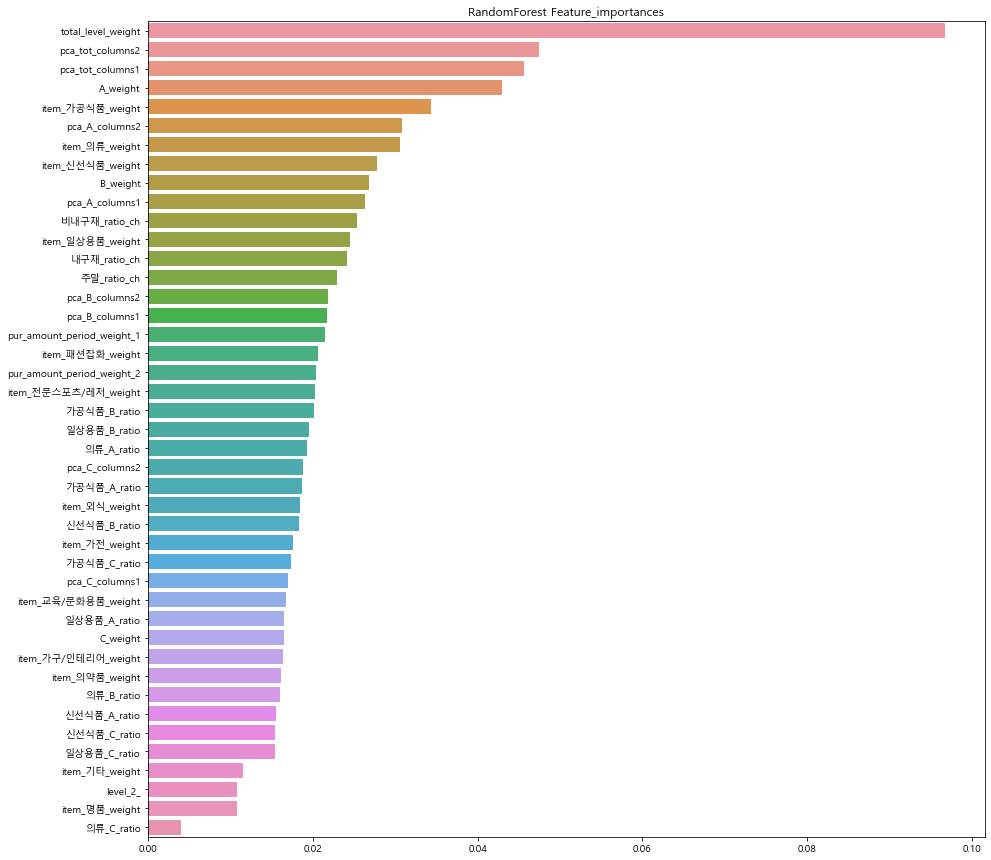

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

li2 = []
for i in zip(rf.feature_importances_, X_train1.columns):
    li2.append(i)
    
li2 = sorted(li2,reverse=True)

fi2 = [x[0] for x in li2]
na2 = [x[1] for x in li2]

plt.figure(figsize=(15,15))
plt.rc('font',family='Malgun Gothic')
plt.title('RandomForest Feature_importances')
sns.barplot(x=fi2,y=na2)

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train1, y_train1)
acc4= dt.predict(X_test1)

print (accuracy_score(y_test1, acc4))

0.7025028441410694


[Text(1674.0, 2989.7999999999997, 'total_level_weight <= -0.95\ngini = 0.487\nsamples = 19338\nvalue = [11207, 8131]'),
 Text(837.0, 2446.2, 'pca_tot_columns1 <= -0.25\ngini = 0.418\nsamples = 6812\nvalue = [2026, 4786]'),
 Text(418.5, 1902.6, 'B_weight <= -4.25\ngini = 0.476\nsamples = 2664\nvalue = [1040, 1624]'),
 Text(209.25, 1358.9999999999998, 'pca_B_columns1 <= 0.544\ngini = 0.357\nsamples = 412\nvalue = [96, 316]'),
 Text(104.625, 815.3999999999996, '일상용품_B_ratio <= 0.022\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(52.3125, 271.7999999999997, 'gini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(156.9375, 271.7999999999997, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(313.875, 815.3999999999996, '신선식품_B_ratio <= -0.005\ngini = 0.339\nsamples = 397\nvalue = [86, 311]'),
 Text(261.5625, 271.7999999999997, 'gini = 0.429\nsamples = 157\nvalue = [49, 108]'),
 Text(366.1875, 271.7999999999997, 'gini = 0.261\nsamples = 240\nvalue = [37, 203]'),
 Text(627.75, 1358.9999999

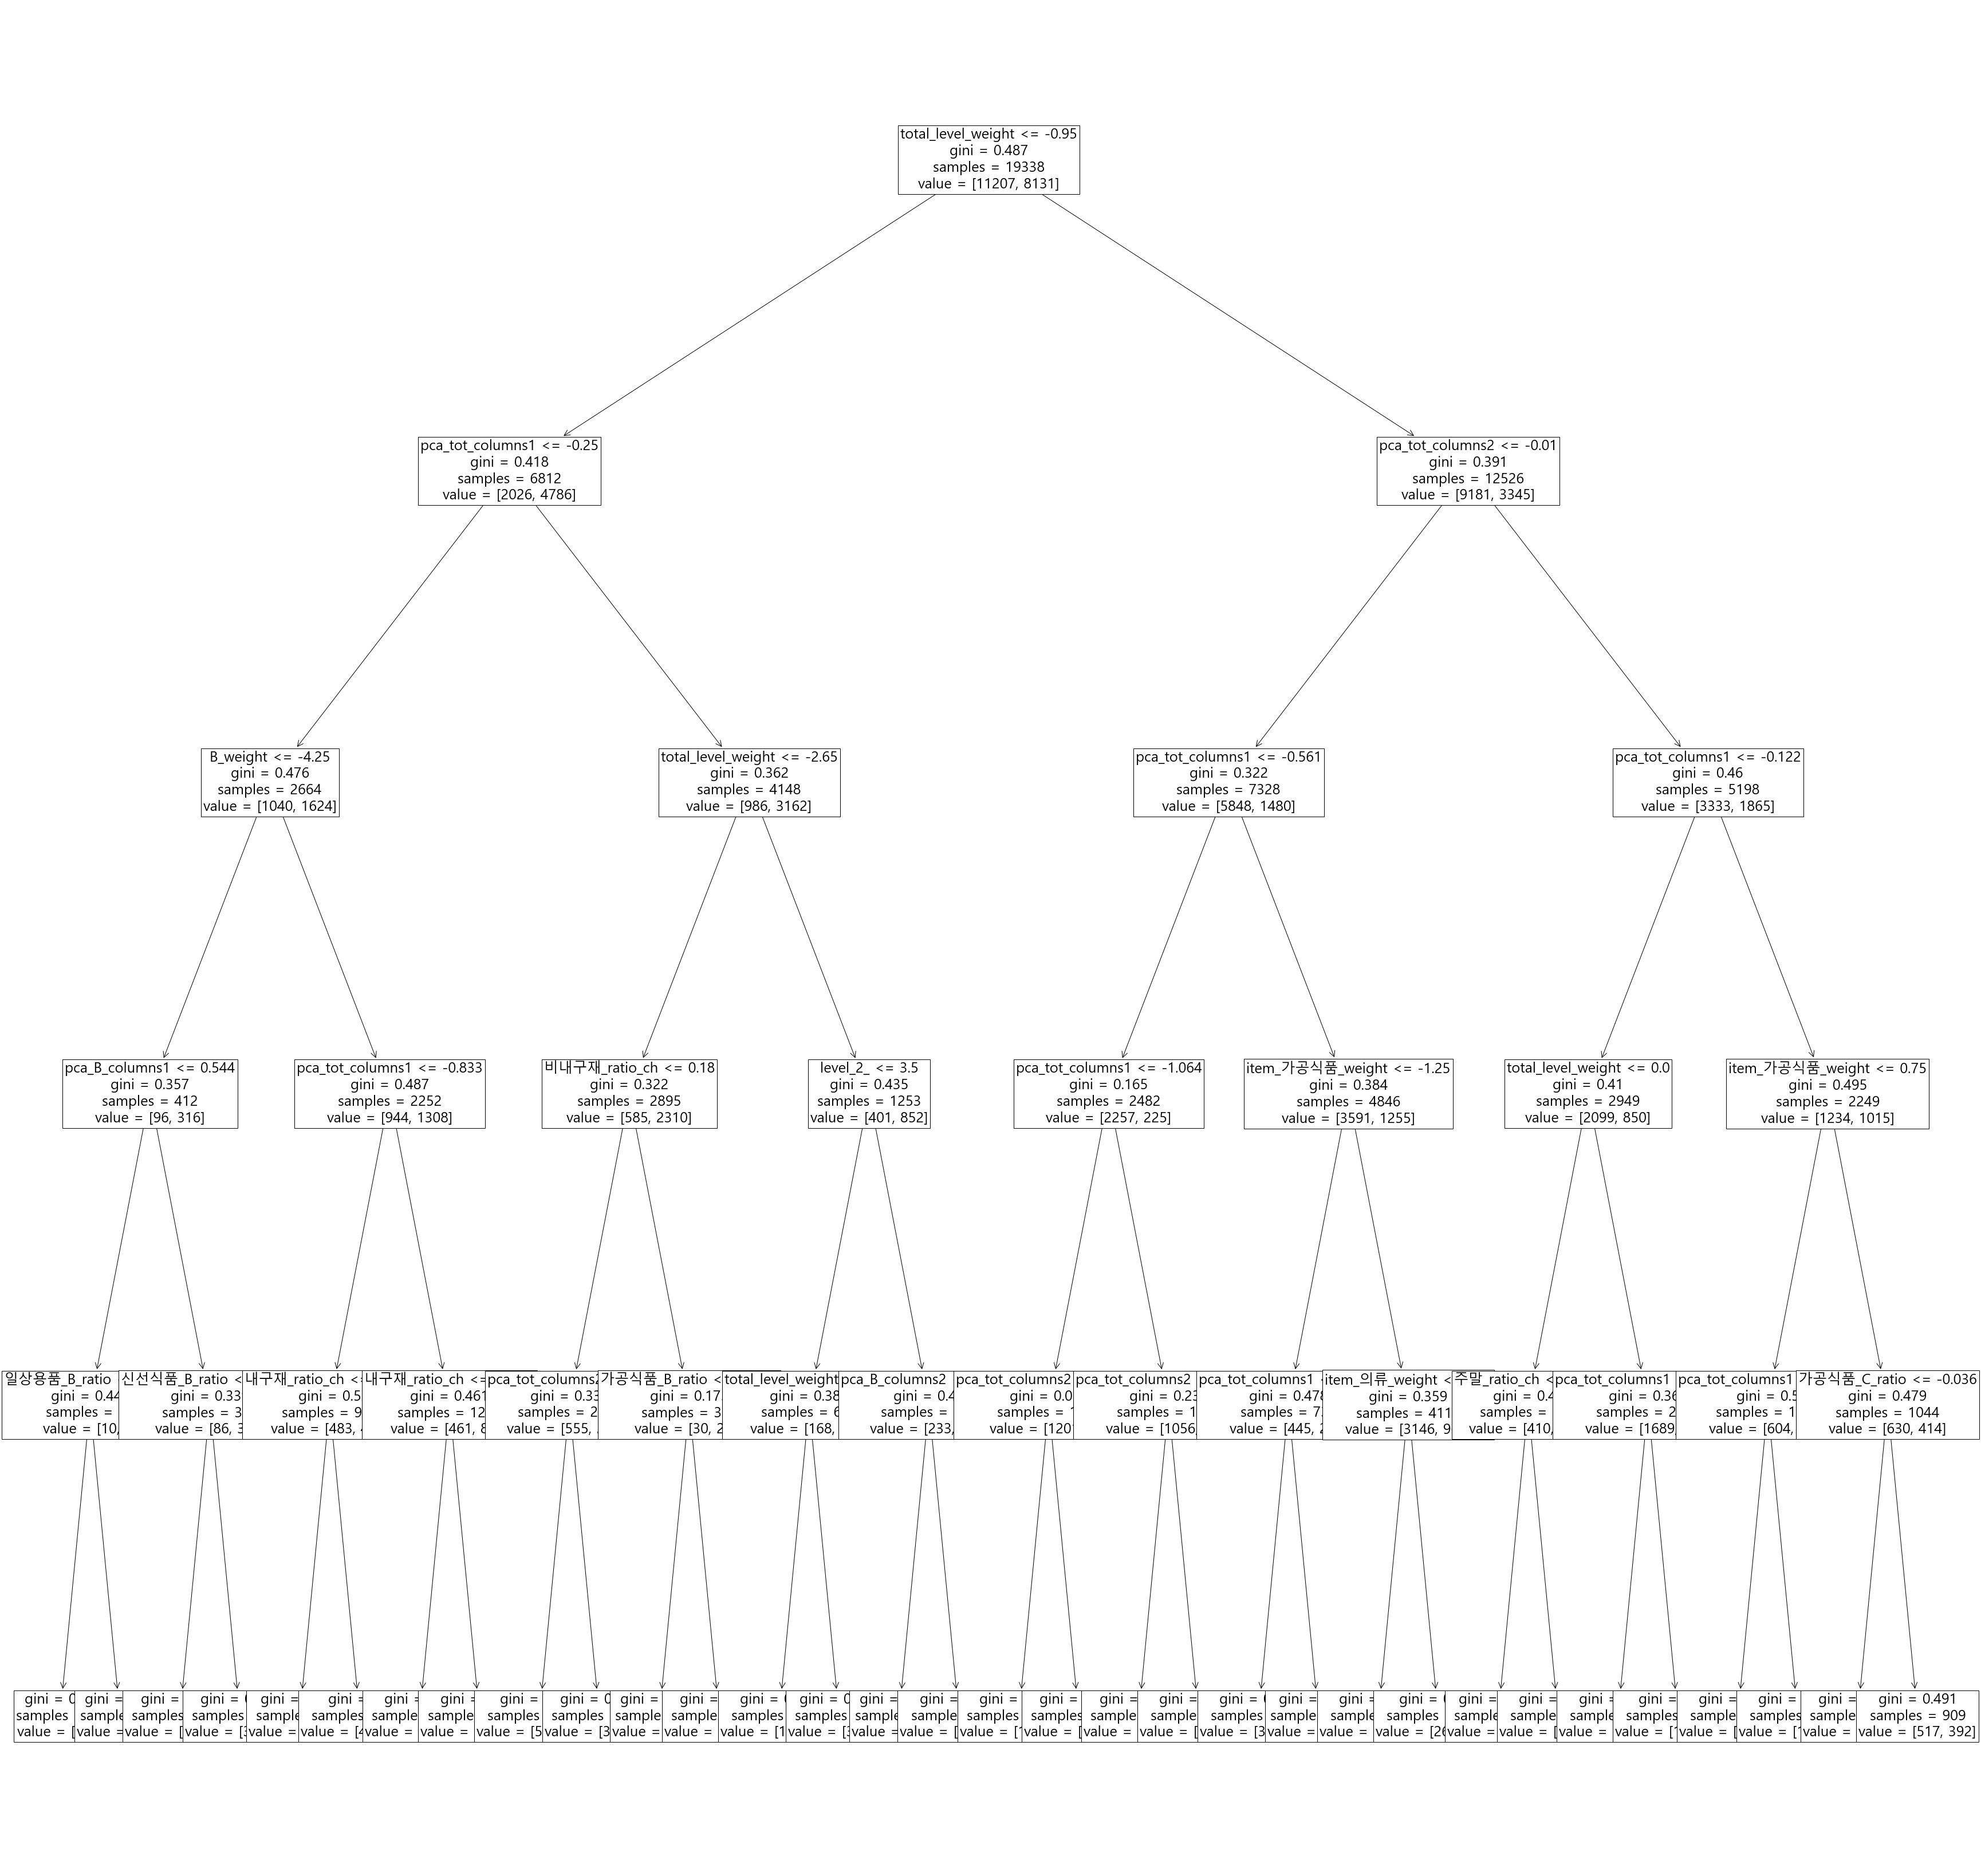

In [45]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(60,60))

plot_tree(dt, feature_names=X_train1.columns, fontsize=25)

In [48]:
lab1.to_csv('dataset/train_최종변수_2.csv',index=False)
test1.to_csv('dataset/test_최종변수_2.csv',index=False)

In [117]:
df_t = pd.read_csv('dataframe/test_변수.csv').drop('label_1',axis=1)

In [91]:
datas.head(1)

,cust_no,total_level_weight,A_weight,B_weight,C_weight,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,...,total_freq_3,mem_2,mem_3,pur_amount_period_2_weight,pur_amount_period_3_weight,가공식품_ratio,신선식품_ratio,일상용품_ratio,의류_ratio,label
0,1,-8.0,-7.5,-2.4,-4.0,4.625371,-0.692738,-1.906162,0.000608,-1.022267,...,0.752461,NaN,NaN,8.5,-4.5,0.044021,0.044242,0.111693,0.432889,1


In [118]:
df_t = pd.merge(df_t, data[['cust_no','level']],on='cust_no',how='left')
df_t

,cust_no,total_level_weight,A_weight,B_weight,C_weight,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,...,mem_2,mem_3,pur_amount_period_2_weight,pur_amount_period_3_weight,가공식품_ratio,신선식품_ratio,일상용품_ratio,의류_ratio,label,level
0,1,-8.0,-7.5,-2.4,-4.0,4.625371,-0.692738,-1.906162,0.000608,-1.022267,...,NaN,NaN,8.5,-4.5,0.044021,0.044242,0.111693,0.432889,1,9
1,2,8.0,8.0,1.0,0.0,3.624661,-0.371331,-1.997429,-0.042391,-1.322925,...,NaN,NaN,-8.0,-8.5,0.040229,0.079666,0.349028,0.302223,0,9
2,3,-0.4,0.0,-0.1,-6.0,-2.180488,-0.003956,-2.065136,0.028526,3.284481,...,NaN,NaN,-0.6,0.2,0.628504,0.254762,0.100279,0.000000,1,0
3,4,-2.0,-3.0,-1.6,2.0,1.328354,0.404490,-1.639563,0.080851,-0.915064,...,NaN,NaN,-3.0,2.0,0.138703,0.121325,0.144481,0.363799,1,4
4,5,2.1,3.0,0.0,0.0,0.597256,-0.216947,-2.087648,0.001192,-1.322925,...,NaN,NaN,-2.4,-2.8,0.468657,0.103907,0.147578,0.121767,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19351,19283,3.0,3.0,0.0,0.0,-1.296001,1.020647,-2.087648,0.001192,-1.322925,...,NaN,NaN,0.0,2.0,0.269398,0.003340,0.609924,0.010115,0,3
19352,19350,0.8,0.0,0.2,0.1,-2.180488,-0.003956,-1.978434,-0.115895,-1.305582,...,NaN,NaN,0.0,0.1,0.210108,0.000000,0.775768,0.000000,0,0
19353,19381,1.6,0.8,3.0,0.0,-2.143175,0.025591,1.288116,-3.386382,-1.322925,...,NaN,1.0,0.0,0.2,0.287656,0.434735,0.061426,0.153655,0,0
19354,19382,0.8,0.6,2.5,0.0,-2.110804,0.069929,1.044389,-3.148747,-1.322925,...,NaN,NaN,0.0,3.5,0.425020,0.317226,0.063813,0.038812,0,0


In [67]:
data['ch'] = data['2015_2'] - data['2014_2']
data['label'] = data['label'].apply(lambda x: 1 if x < 0 else 0 )

In [ ]:
datas['label']

In [96]:
tt = pd.merge(datas[['cust_no','label']], data[['cust_no','label']],on='cust_no',how='left')
tt.loc[tt['label_x'] != tt['label_y']]

,cust_no,label_x,label_y
0,1,1,0
2,3,1,0
3,4,1,0
6,7,1,0
7,8,1,0
...,...,...,...
19274,19357,1,0
19276,19359,1,0
19277,19360,1,0
19281,19364,1,0


In [97]:
datas = pd.read_csv('dataset/amount_di_test_scaler_2-3.csv',index_col=0)
datas

,cust_no,가공식품_scaler,가구/인테리어_scaler,가전_scaler,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,일상용품_scaler,전문스포츠/레저_scaler,패션잡화_scaler
0,1,0.013862,-2.841970,-3.418760,0.016043,-0.027039,0.081146,-0.209715,-0.285500,-0.106332,0.183621,-1.437720,0.424272,0.173358
1,2,-0.024078,0.034478,0.456606,0.016043,-0.027039,0.202304,-0.342187,-1.031952,0.278649,0.442605,0.810938,-0.127795,-0.000398
2,3,-0.040002,0.007890,-0.017854,0.016043,-0.027039,-0.019476,-0.106111,0.002778,0.012492,-0.005478,-0.030708,0.049273,0.017033
3,4,0.040370,-0.278864,-0.007391,0.016043,-0.027039,-0.019476,0.299472,1.044245,0.010783,-0.139766,-0.196011,-0.295332,-0.000315
4,5,0.095385,-0.136405,-0.007391,0.016043,-0.027039,-0.019476,-0.039848,-0.078143,0.042625,0.033575,0.070687,0.004771,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19351,19283,0.267659,0.007890,-0.007391,0.016043,-0.027039,-0.019476,-0.023917,0.348647,0.018897,-0.005478,1.497185,0.049273,0.160031
19352,19350,0.054816,0.007890,-0.007391,0.016043,-0.027039,-0.019476,-0.039365,0.002778,0.012492,0.293929,0.467172,0.049273,0.017033
19353,19381,0.130270,0.060904,-0.007391,0.021862,-0.027039,-0.019476,0.863739,0.123545,0.056187,0.071258,0.059556,0.061398,0.027079
19354,19382,0.125829,0.010948,-0.007391,0.039242,-0.027039,-0.019476,0.391002,0.399583,0.019700,0.661851,0.037656,0.119712,0.020684


In [119]:
df_t = pd.merge(df_t, datas, on='cust_no',how='left')
df_t

,cust_no,total_level_weight,A_weight,B_weight,C_weight,pca_A_columns1,pca_A_columns2,pca_B_columns1,pca_B_columns2,pca_C_columns1,...,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,일상용품_scaler,전문스포츠/레저_scaler,패션잡화_scaler
0,1,-8.0,-7.5,-2.4,-4.0,4.625371,-0.692738,-1.906162,0.000608,-1.022267,...,0.016043,-0.027039,0.081146,-0.209715,-0.285500,-0.106332,0.183621,-1.437720,0.424272,0.173358
1,2,8.0,8.0,1.0,0.0,3.624661,-0.371331,-1.997429,-0.042391,-1.322925,...,0.016043,-0.027039,0.202304,-0.342187,-1.031952,0.278649,0.442605,0.810938,-0.127795,-0.000398
2,3,-0.4,0.0,-0.1,-6.0,-2.180488,-0.003956,-2.065136,0.028526,3.284481,...,0.016043,-0.027039,-0.019476,-0.106111,0.002778,0.012492,-0.005478,-0.030708,0.049273,0.017033
3,4,-2.0,-3.0,-1.6,2.0,1.328354,0.404490,-1.639563,0.080851,-0.915064,...,0.016043,-0.027039,-0.019476,0.299472,1.044245,0.010783,-0.139766,-0.196011,-0.295332,-0.000315
4,5,2.1,3.0,0.0,0.0,0.597256,-0.216947,-2.087648,0.001192,-1.322925,...,0.016043,-0.027039,-0.019476,-0.039848,-0.078143,0.042625,0.033575,0.070687,0.004771,0.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19351,19283,3.0,3.0,0.0,0.0,-1.296001,1.020647,-2.087648,0.001192,-1.322925,...,0.016043,-0.027039,-0.019476,-0.023917,0.348647,0.018897,-0.005478,1.497185,0.049273,0.160031
19352,19350,0.8,0.0,0.2,0.1,-2.180488,-0.003956,-1.978434,-0.115895,-1.305582,...,0.016043,-0.027039,-0.019476,-0.039365,0.002778,0.012492,0.293929,0.467172,0.049273,0.017033
19353,19381,1.6,0.8,3.0,0.0,-2.143175,0.025591,1.288116,-3.386382,-1.322925,...,0.021862,-0.027039,-0.019476,0.863739,0.123545,0.056187,0.071258,0.059556,0.061398,0.027079
19354,19382,0.8,0.6,2.5,0.0,-2.110804,0.069929,1.044389,-3.148747,-1.322925,...,0.039242,-0.027039,-0.019476,0.391002,0.399583,0.019700,0.661851,0.037656,0.119712,0.020684


In [120]:
df_t.rename(columns = {'mem_2' : 'mem_1', 'mem_3':'mem_2',
                      'pur_amount_period_2_weight':'pur_amount_period_weight_1',
                      'pur_amount_period_3_weight':'pur_amount_period_weight_2',
                     'total_freq_2':'total_freq_1','total_freq_3':'total_freq_2',
                     }, inplace = True)

In [122]:
pd.read_csv('dataframe/train_set_1016.csv')


,cust_no,mem_1,mem_2,label,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,...,pca_B_columns1,pca_B_columns2,pca_C_columns1,pca_C_columns2,total_freq_1,total_freq_2,일상용품,가공식품,신선식품,의류
0,1,0.0,0.0,1,0.396531,0.073318,8.5,5.0,0.9,2.4,...,-1.773943,0.142554,-1.040971,0.049068,0.460565,1.451767,0.127991,0.085607,0.041296,0.397010
1,2,0.0,0.0,0,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,...,-1.928316,0.087687,-1.288658,0.027766,0.992291,0.435362,0.353213,0.056563,0.119751,0.211507
2,3,0.0,0.0,1,0.025802,0.049851,0.2,-0.1,0.1,3.2,...,-1.959386,0.083715,3.108841,-0.668311,-0.107833,0.454909,0.070162,0.669907,0.203483,0.042244
3,4,0.0,0.0,1,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,...,-1.636641,0.075878,-0.853339,0.002387,0.057186,-0.776505,0.105665,0.125168,0.095436,0.403639
4,5,0.0,0.0,1,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,...,-1.962930,0.080759,-1.288658,0.027766,1.579024,-1.362893,0.207327,0.381718,0.139771,0.092234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,19376,0.0,0.0,0,0.000000,0.347826,0.1,0.0,0.6,0.0,...,-1.542395,0.006056,-1.288658,0.027766,-2.454764,-2.379298,0.006586,0.546731,0.446683,0.000000
19334,19377,0.0,2.0,0,0.000000,0.600000,0.1,0.1,0.1,0.0,...,-1.959541,0.083360,-1.288658,0.027766,-2.454764,-2.633399,0.793614,0.075727,0.000000,0.073151
19335,19378,0.0,0.0,0,0.000000,0.263158,0.2,0.4,0.1,0.0,...,-1.948142,0.074802,-1.288658,0.027766,-2.454764,-2.457483,0.472281,0.050131,0.141124,0.318561
19336,19379,0.0,1.0,0,0.000000,0.142857,0.3,0.4,0.0,0.0,...,-1.974808,0.089338,-1.288658,0.027766,-2.454764,-1.734271,0.504216,0.090491,0.000000,0.000000


In [ ]:


dd.drop(['total_freq_1','total_freq_2'],axis=1,inplace=True)
dd = pd.merge(dd,non1,on='cust_no',how='outer')
dd

In [121]:
import numpy as np
np.setdiff1d(df_t.columns, train.columns)

array(['total_freq_1', 'total_freq_2', '가공식품_ratio', '신선식품_ratio',
       '의류_ratio', '일상용품_ratio'], dtype=object)

In [113]:
# df_t.drop('label',axis=1, inplace=True)
df_t = pd.merge(df_t, data[['cust_no','label']],on='cust_no',how='left')

In [63]:
train = pd.read_csv('dataset/train_최종변수_3.csv')
train.head()

,cust_no,mem_1,mem_2,내구재_ratio_ch,주말_ratio_ch,total_level_weight,A_weight,B_weight,C_weight,item_가공식품_weight,...,교육/문화용품_scaler,기타_scaler,명품_scaler,신선식품_scaler,외식_scaler,의류_scaler,의약품_scaler,일상용품_scaler,전문스포츠/레저_scaler,패션잡화_scaler
0,1,-1.0,-1.0,0.396531,0.073318,8.5,5.0,0.9,2.4,-7.5,...,-0.012462,-0.171996,-0.014445,0.140711,1.865518,0.173724,0.157912,1.064081,-0.703225,-0.109009
1,2,-1.0,-1.0,-0.027302,-0.053000,-6.4,-4.0,0.2,0.0,-6.5,...,-0.012462,-0.171996,0.068414,-0.609878,-0.407048,0.209083,-0.038437,-0.476957,-0.410984,-0.075930
2,3,-1.0,-1.0,0.025802,0.049851,0.2,-0.1,0.1,3.2,0.8,...,-0.012462,-0.171996,-0.014445,0.049806,-0.130594,-0.033016,-0.038437,0.016946,-0.006032,-0.020604
3,4,-1.0,-1.0,0.098064,-0.064373,-3.0,-1.8,0.9,-2.4,-3.2,...,-0.012462,-0.171996,-0.014445,-0.208075,-0.423822,-0.102602,-0.296636,0.254399,0.062689,-0.109294
4,5,-1.0,-1.0,0.075806,-0.042121,-3.6,-2.8,-0.1,0.0,-6.5,...,-0.012462,-0.171996,-0.025324,-0.286706,-1.124892,-0.059585,-0.038437,-0.468876,-0.003391,-0.035084


In [123]:
train.columns

Index(['cust_no', 'mem_1', 'mem_2', '내구재_ratio_ch', '주말_ratio_ch',
       'total_level_weight', 'A_weight', 'B_weight', 'C_weight',
       'item_가공식품_weight', 'item_의약품_weight', 'item_신선식품_weight',
       'item_일상용품_weight', 'item_교육/문화용품_weight', 'item_외식_weight',
       'item_패션잡화_weight', 'item_의류_weight', 'item_기타_weight',
       'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight', 'item_가전_weight',
       'item_명품_weight', 'pur_amount_period_weight_1',
       'pur_amount_period_weight_2', 'pca_tot_columns1', 'pca_tot_columns2',
       'pca_A_columns1', 'pca_A_columns2', 'pca_B_columns1', 'pca_B_columns2',
       'pca_C_columns1', 'pca_C_columns2', '비내구재_ratio_ch', '가공식품_A_ratio',
       '신선식품_A_ratio', '일상용품_A_ratio', '의류_A_ratio', '가공식품_B_ratio',
       '신선식품_B_ratio', '일상용품_B_ratio', '의류_B_ratio', '가공식품_C_ratio',
       '신선식품_C_ratio', '일상용품_C_ratio', '의류_C_ratio', 'label', 'level',
       '가공식품_scaler', '가구/인테리어_scaler', '가전_scaler', '교육/문화용품_scaler',
       '기타_scaler', '명품_scaler',

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [100]:
X_train1 = train.drop(['label','cust_no',
#                          'mem_1','mem_2',
#                          'item_의약품_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                          'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                          '주말_ratio_ch'
                        ],axis=1).fillna(0)
y_train1 = train['label']

X_test1 = df_t.drop(['label','cust_no',
#                        'mem_1','mem_2',
#                       'item_의약품_weight',
#          'item_교육/문화용품_weight',
#        'item_외식_weight', 'item_패션잡화_weight', 
#        'item_기타_weight', 'item_전문스포츠/레저_weight', 'item_가구/인테리어_weight',
#        'item_가전_weight', 
#                        'item_명품_weight',
#         'pur_amount_period_weight_1', 'pur_amount_period_weight_2',
#                       '주말_ratio_ch'
                      ],axis=1).fillna(0)
y_test1 = df_t['label']

In [101]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train1,y_train1)
preds1=rf.predict(X_test1)

acc1 = accuracy_score(y_test1, preds1)*100
print (acc1)

ValueError: X has 49 features, but DecisionTreeClassifier is expecting 58 features as input.